In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.interpolate import Rbf

In [3]:
#Import sample data (n=64) and stratified sample data (n=18)
sample = pd.read_csv('sample.csv')
stratified_sample = pd.read_csv('stratified_sample.csv')

In [4]:
sample_array = sample.values #array of sample values
stratified_sample_array = stratified_sample.values #array of stratified sample values

In [5]:
xi = sample_array[:,0] #X position for sample
yi = sample_array[:,1] #Y position for sample
z_real = sample_array[:,2] #Soil moisture values for sample

In [6]:
x = stratified_sample_array[:,0] #X position for stratified sample
y = stratified_sample_array[:,1] #Y position for stratified sample
z = stratified_sample_array[:,2] #Soil moisture values for stratified sample

In [7]:
def mape(y, y_pred):
    '''returns mean absolute percentage error for given arrays'''
    return np.sum(np.abs((y - y_pred)/y))*(100/len(y))

def mse(y, y_pred):
    '''returns mean squared error for given arrays'''
    return np.sum((y_pred - y)**2)/len(y)

def rmse(y, y_pred):
    '''returns root mean squared error for given arrays'''
    return np.sqrt(np.sum((y_pred - y)**2)/len(y))

In [8]:
#Arrays to store epsilon and error values 
mape_array = np.array([])
mse_array = np.array([])
rmse_array = np.array([])
epsilon_array = np.array([])

#Exhaustive search for best epsilon parameter in RBF interpolation 
for eps in np.linspace(0.01,50,10000):
    rbfi = Rbf(x, y, z, function='gaussian', epsilon=eps) #radial basis function interpolator instance
    
    zi = rbfi(xi, yi) #array of interpolated values using the RBF
    
    #Storage of epsilon and error values
    mape_array = np.append(mape_array, mape(z_real, zi))
    mse_array = np.append(mse_array, mse(z_real, zi))
    rmse_array = np.append(rmse_array, rmse(z_real, zi))
    epsilon_array = np.append(epsilon_array, eps)

Text(0.5,0,'Epsilon')

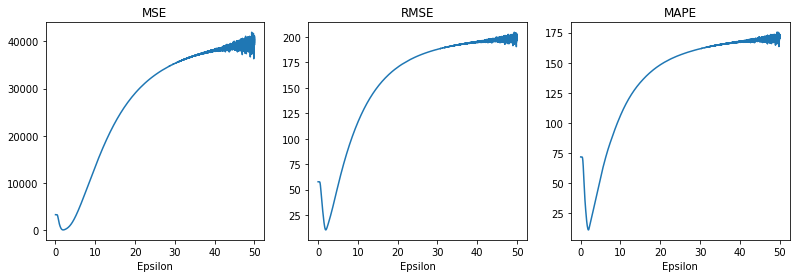

In [9]:
#set up a figure
fig1 = plt.figure(figsize=plt.figaspect(0.3))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax1 = fig1.add_subplot(1, 3, 1)

# plot mse error
surf = ax1.plot(epsilon_array,mse_array)
ax1.set_title('MSE')
ax1.set_xlabel('Epsilon')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax2 = fig1.add_subplot(1, 3, 2)

# plot rmse error
surf = ax2.plot(epsilon_array,rmse_array)
ax2.set_title('RMSE')
ax2.set_xlabel('Epsilon')


#===============
# Third subplot
#===============
# set up the axes for the third plot
ax = fig1.add_subplot(1, 3, 3)

# plot mse error
surf = ax.plot(epsilon_array,mape_array)
ax.set_title('MAPE')
ax.set_xlabel('Epsilon')

In [10]:
#Consolidation of the error report
error_report = np.zeros((mape_array.shape[0],4))
error_report[:,0] = epsilon_array
error_report[:,1] = mse_array
error_report[:,2] = rmse_array
error_report[:,3] = mape_array

error_report_df = pd.DataFrame(error_report, columns=['epsilon','mse','rmse','mape'])
top10_error = error_report_df.sort_values(['mse','rmse','mape']).head(10)

top10_error

,epsilon,mse,rmse,mape
385,1.934807,107.362598,10.361592,11.390425
384,1.929808,107.365444,10.361730,11.389925
386,1.939807,107.394631,10.363138,11.391003
383,1.924808,107.403690,10.363575,11.389502
387,1.944806,107.461028,10.366341,11.391659
382,1.919809,107.477861,10.367153,11.391503
388,1.949806,107.561280,10.371175,11.392392
381,1.914809,107.588490,10.372487,11.400344
389,1.954805,107.694882,10.377614,11.393203
380,1.909810,107.736114,10.379601,11.409359


In [11]:
rbfi = Rbf(x, y, z, function='gaussian', epsilon=1.934807) #rbf interpolator instance with best epsilon
zi = rbfi(xi, yi) #array of interpolated values using the RBF

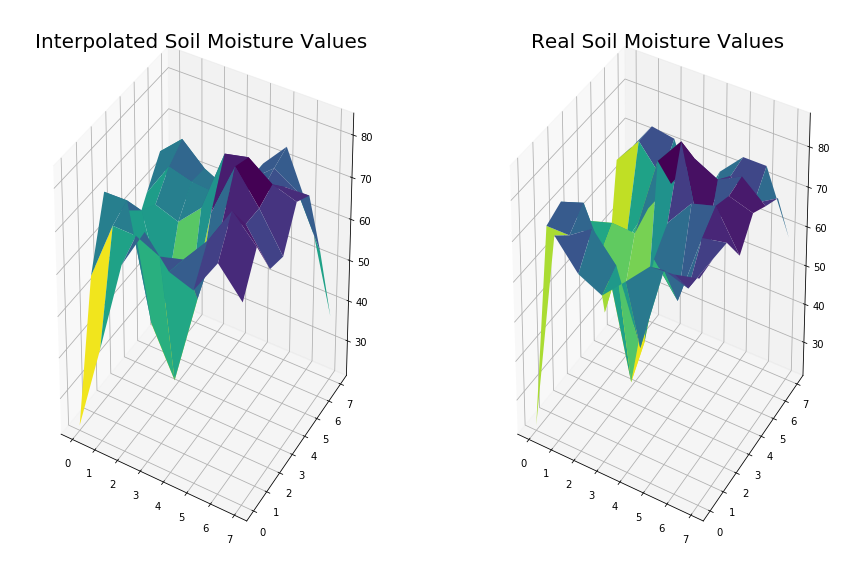

In [12]:
Xi, Yi = np.mgrid[:7:8j, 0:7:8j] #Arrays of X and Y coordinate positions in grid form
Zi = zi.reshape(8,8) #Arrays of interpolated soil moisture values in grid form
Z_real = z_real.reshape(8,8) #Arrays of real soil moisture values in grid form

#set up a figure
fig = plt.figure(figsize=(15,10))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
surf = ax.plot_surface(Xi, Yi, Zi, cmap=cm.viridis_r, linewidth=0)
ax.set_title('Interpolated Soil Moisture Values', fontsize=20)


#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Real Soil Moisture Values', fontsize=20)

# plot a 3D surface like in the example mplot3d/surface3d_demo
surf = ax.plot_surface(Xi, Yi, Z_real, cmap=cm.viridis_r, linewidth=0)

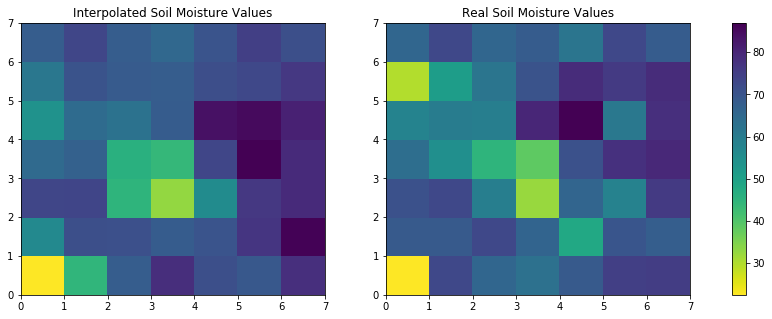

In [13]:
#set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(15,5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1)

# plot a 2D surface
colormesh1 = plt.pcolormesh(Xi,Yi, Zi, cmap=cm.viridis_r)
ax1.set_title('Interpolated Soil Moisture Values')
ax1.set_xticks(range(8))

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2)

# plot a 2D surface
colormesh2 = plt.pcolormesh(Xi,Yi, Z_real.reshape(8,8), cmap=cm.viridis_r)
ax2.set_title('Real Soil Moisture Values')
ax2.set_xticks(range(8));

#Add colorbar to the figure
plt.colorbar(colormesh2, ax=[ax1,ax2]);

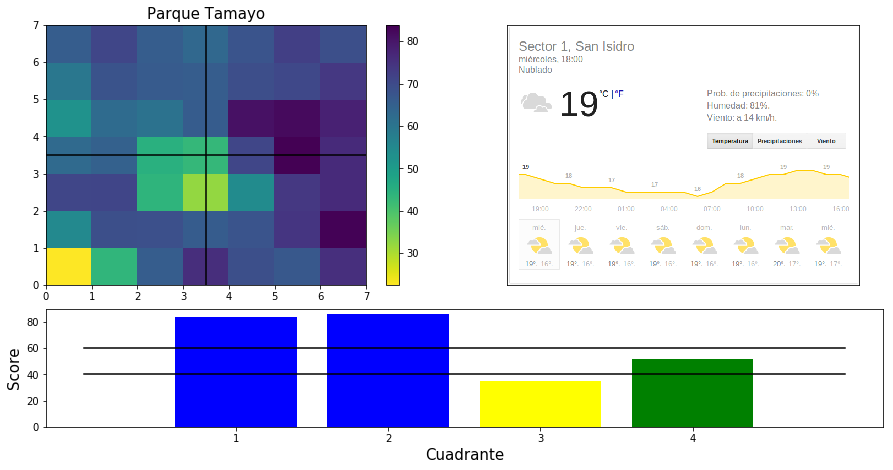

In [17]:
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from PIL import Image

fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((4, 4), (0, 0), colspan=2, rowspan=2) #heatmap
colormesh1 = plt.pcolormesh(Xi,Yi, Zi, cmap=cm.viridis_r)
#Add colorbar to the figure
plt.colorbar(colormesh1);
ax1.set_title('Parque Tamayo', fontsize=15)
ax1.set_xticks(range(8))
#ax1.grid(color='k')
ax1.plot(np.ones(8)*3.5,range(8), color='k')
ax1.plot(range(8),np.ones(8)*3.5, color='k')
ax2 = plt.subplot2grid((4, 4), (0, 2), colspan=2, rowspan=2) #weather
img = mpimg.imread('Temperatura.png')

imgplot = plt.imshow(img)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = plt.subplot2grid((4, 4), (2, 0), colspan=4) #score
x = [1,2,3,4]
y = [83.46, 85.85, 34.98, 52]
xx = [0,1,2,3,4,5]
threshold1 = [40,40,40,40,40,40]
threshold2 = [60,60,60,60,60,60]
plt.bar(x,y, color=['blue','blue','yellow', 'green'])
plt.plot(xx,threshold1, color='k')
plt.plot(xx,threshold2, color='k')
ax3.set_xticks([1,2,3,4])
ax3.set_xlabel('Cuadrante', fontsize=15);
ax3.set_ylabel('Score', fontsize=15);

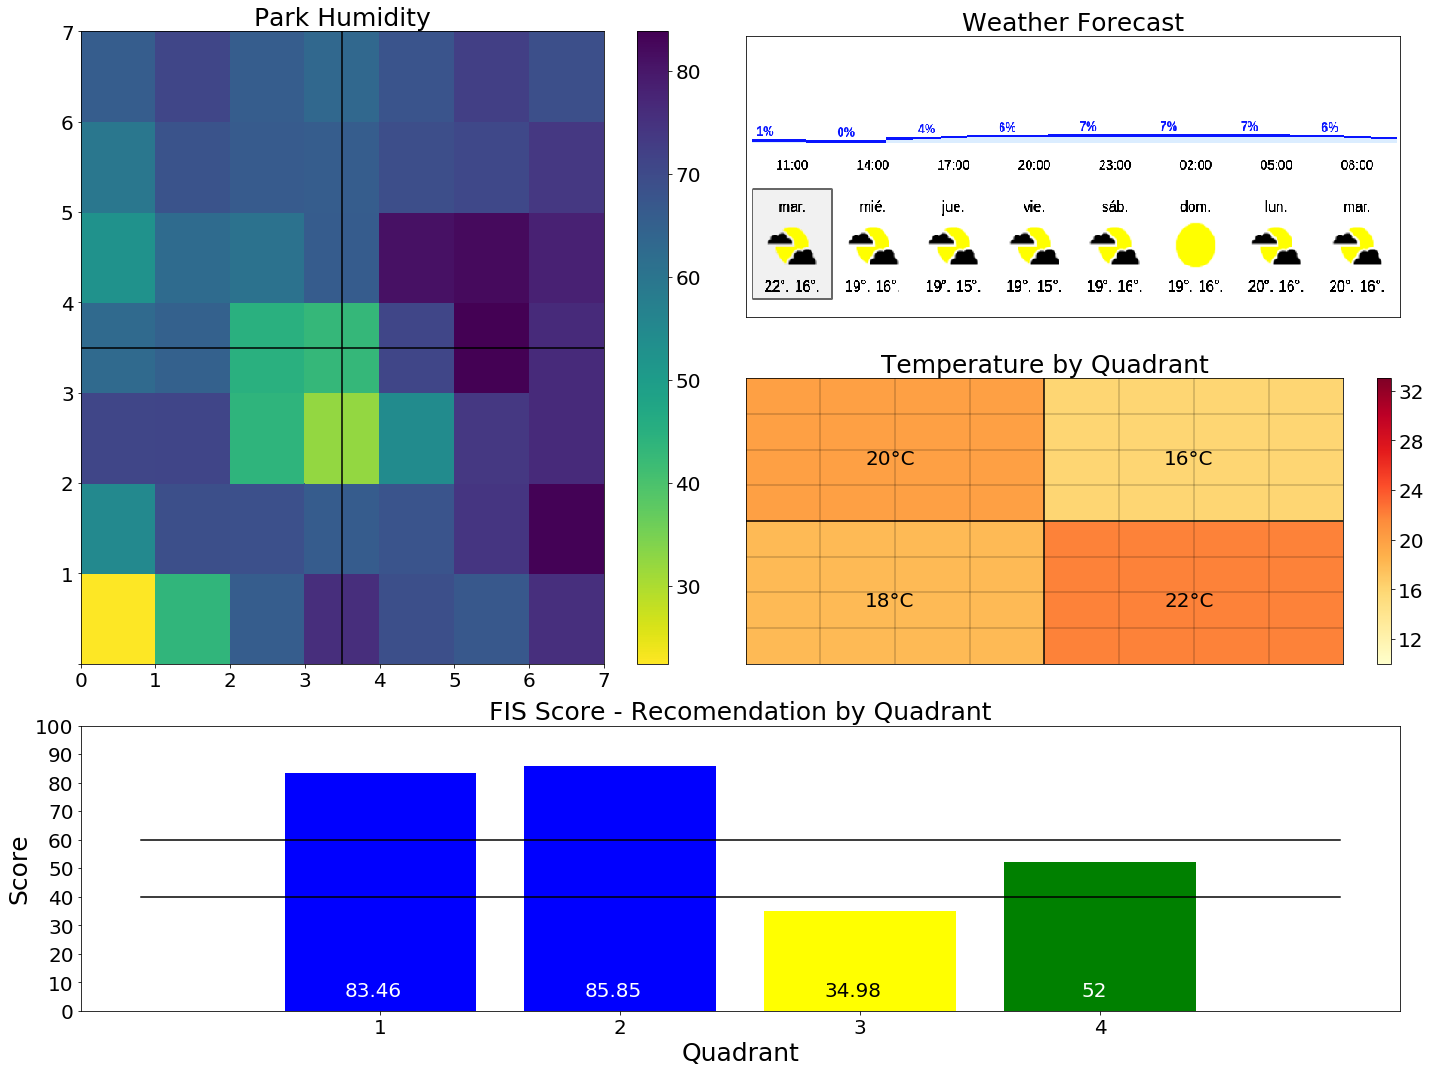

In [120]:
# DASHBOARD V2

import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from PIL import Image

fig = plt.figure(figsize=(20,15))

#----------Soil Moisture heatmap-----------------
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2, rowspan=2)
colormesh1 = plt.pcolormesh(Xi,Yi, Zi, cmap=cm.viridis_r)
cbar = plt.colorbar(colormesh1)
cbar.ax.tick_params(labelsize=20) 
ax1.set_title('Park Humidity', fontsize=25)
ax1.set_xticks(range(8))
for ticks in ax1.xaxis.get_major_ticks():
    ticks.label.set_fontsize(20)
ax1.set_yticklabels(['',1,2,3,4,5,6,7])
for ticks in ax1.yaxis.get_major_ticks():
    ticks.label.set_fontsize(20)
ax1.plot(np.ones(8)*3.5,range(8), color='k')
ax1.plot(range(8),np.ones(8)*3.5, color='k')

#----------Weather Forecast--------------------
ax2 = plt.subplot2grid((3, 4), (0,2), colspan=2, rowspan=1)
img = Image.open('weather_forecast_v2.png')
img = img.resize((700,300))
imgplot = plt.imshow(img)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Weather Forecast', fontsize=25)
ax2.set_adjustable('box')
ax2.set_anchor('SW')

#------------Temperature Heatmap-----------------
ax3 = plt.subplot2grid((3, 4), (1, 2), colspan=2, rowspan=1)
colormesh_temp = plt.pcolormesh(Z_temp, cmap=cm.YlOrRd, vmin=10, vmax=33)
cbar_temp = plt.colorbar(colormesh_temp, pad=0.051, fraction=0.035)
cbar_temp.ax.tick_params(labelsize=20)  
cbar_temp.set_ticks(range(0,33,4))
ax3.set_title('Temperature by Quadrant', fontsize=25)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.text(0.4,0.4,'18°C',fontsize=20)
ax3.text(1.4,0.4,'22°C',fontsize=20)
ax3.text(0.4,1.4,'20°C', fontsize=20)
ax3.text(1.4,1.4,'16°C', fontsize=20)

ax3.plot(np.ones(3)*0.25,range(3), color='k', alpha=0.2)
ax3.plot(np.ones(3)*0.5,range(3), color='k', alpha=0.2)
ax3.plot(np.ones(3)*0.75,range(3), color='k', alpha=0.2)
ax3.plot(np.ones(3),range(3), color='k')
ax3.plot(np.ones(3)*1.25,range(3), color='k', alpha=0.2)
ax3.plot(np.ones(3)*1.5,range(3), color='k', alpha=0.2)
ax3.plot(np.ones(3)*1.75,range(3), color='k', alpha=0.2)

ax3.plot(range(3), np.ones(3)*0.25, color='k', alpha=0.2)
ax3.plot(range(3), np.ones(3)*0.5, color='k', alpha=0.2)
ax3.plot(range(3), np.ones(3)*0.75, color='k', alpha=0.2)
ax3.plot(range(3), np.ones(3), color='k')
ax3.plot(range(3), np.ones(3)*1.25, color='k', alpha=0.2)
ax3.plot(range(3), np.ones(3)*1.5, color='k', alpha=0.2)
ax3.plot(range(3), np.ones(3)*1.75, color='k', alpha=0.2)

# ax3.plot(range(3),np.ones(3), color='k')
# ax3.plot(range(3),np.ones(3), color='k')
# ax3.plot(range(3),np.ones(3)*3, color='k')

#-----------Fuzzy Scores by Segment-------------
ax4 = plt.subplot2grid((3, 4), (2, 0), colspan=4)
x = [1,2,3,4]
y = [83.46, 85.85, 34.98, 52]
xx = [0,1,2,3,4,5]
threshold1 = [40,40,40,40,40,40]
threshold2 = [60,60,60,60,60,60]
plt.bar(x,y, color=['blue','blue','yellow', 'green'])
plt.plot(xx,threshold1, color='k')
plt.plot(xx,threshold2, color='k')
ax4.set_xticks([1,2,3,4])
ax4.set_yticks(range(0,101,10))
for ticks in ax4.xaxis.get_major_ticks():
    ticks.label.set_fontsize(20)
ax1.set_yticklabels(['',1,2,3,4,5,6,7])
for ticks in ax4.yaxis.get_major_ticks():
    ticks.label.set_fontsize(20)
ax4.set_title('FIS Score - Recomendation by Quadrant', fontsize=25)
ax4.text(0.85,5,y[0],fontsize=20, color='white')
ax4.text(1.85,5,y[1],fontsize=20, color='white')
ax4.text(2.85,5,y[2], fontsize=20)
ax4.text(3.925,5,y[3], fontsize=20, color='white')
ax4.set_xlabel('Quadrant', fontsize=25)
ax4.set_ylabel('Score', fontsize=25)
#--------------------------------

plt.tight_layout()

plt.savefig('dashboard_v2.svg', format='svg');

In [105]:
np.ones(3)*2

array([2., 2., 2.])

In [101]:
Z_temp = np.array([[18., 22],
                   [20., 16.]])